In [208]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from IPython.display import display, Image
import ipywidgets as widgets
import threading
import signal
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [5]:
def signal_handler(signal, frame):
    # KeyboardInterrupt detected, exiting
    global is_interrupted
    is_interrupted = True

## Simple camera, use 'Ctrl-C' to snap a photo

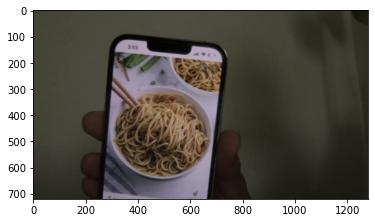

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [306]:
vc = cv2.VideoCapture(0)

plt.ion()

if vc.isOpened(): # try to get the first frame
    is_capturing, frame = vc.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    # makes the blues image look real colored
    webcam_preview = plt.imshow(frame)    
else:
    is_capturing = False

signal.signal(signal.SIGINT, signal_handler)
is_interrupted = False
while is_capturing:
    is_capturing, frame = vc.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    # makes the blues image look real colored
    webcam_preview.set_data(frame)
    plt.draw()

    try:    # Avoids a NotImplementedError caused by `plt.pause`
        plt.pause(0.05)
    except Exception:
        pass
    if is_interrupted:
        vc.release()
        break

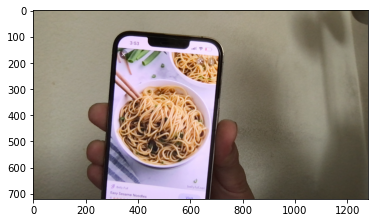

In [307]:
plt.imshow(frame)

In [91]:
import requests
import json
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt


In [214]:
labels = '/Users/codyyu/Desktop/EE267/Project/archive/meta/meta/labels.txt'
classes = '/Users/codyyu/Desktop/EE267/Project/archive/meta/meta/classes.txt'
dataset_path = '/Users/codyyu/Desktop/EE267/Project/archive/images'


In [215]:
label_map = {}
label_map_reverse = {}
def load_label_map(label_map, labels, classes):
    list_of_label = open(labels, 'r').readlines()
    list_of_class = open(classes, 'r').readlines()

    
    for i in range(0, len(list_of_class)):
        # tmp_list = []
        # tmp_list.append(list_of_label[i].strip())
        # tmp_list.append(list_of_class[i].strip())
        label_map[list_of_class[i].strip()] = i
    
load_label_map(label_map, labels, classes)
for l in label_map:
    pass
    #print(str(l) + '  ->  ' + str(label_map[l]))
 

In [216]:
for l in label_map:
    label_map_reverse[label_map[l]] = l


In [217]:
train_data_generator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split = 0.2)

test_data_generator = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2)

In [218]:
batch_size = 32
img_height = 224
img_width = 224

In [219]:
train_data = train_data_generator.flow_from_directory(
    dataset_path,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'training')

val_data = test_data_generator.flow_from_directory(
    dataset_path,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode='categorical',
    subset = 'validation')

Found 80800 images belonging to 101 classes.
Found 20200 images belonging to 101 classes.


Load the trained Efficientnet model

In [194]:
model = tf.keras.models.load_model("/Users/codyyu/Desktop/EE267/Project/model_Efficientnet")

In [195]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Efficientnet_b0 (KerasLayer  (None, 1000)             5330564   
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 1000)              0         
                                                                 
 Output_layer (Dense)        (None, 101)               101101    
                                                                 
Total params: 5,431,665
Trainable params: 101,101
Non-trainable params: 5,330,564
_________________________________________________________________


In [319]:
tf.keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [320]:
model.evaluate(val_data)

632/632 [==============================] - 603s 953ms/step - loss: 1.4777 - accuracy: 0.6450


[1.4776915311813354, 0.645049512386322]

In [137]:
photo = '/Users/codyyu/Desktop/EE267/Project/test_photos/French-fries-b9e3e0c.jpeg'

In [190]:
photo = '/Users/codyyu/Desktop/EE267/Project/archive/images/hot_dog/51048.jpg'

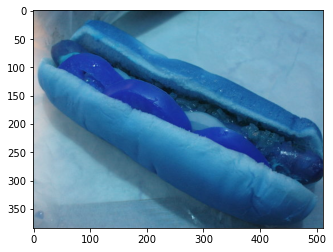

In [191]:
img = cv2.imread(photo)
cv2.imshow('image',img)
plt.imshow(img)

In [177]:
def prepare(filepath):
    image = cv2.imread(filepath)
    image = cv2.resize(image, (224,224))
   # image.reshape(-1, 224, 224, 3)
    image = image[np.newaxis, :,  :, :]
    return image.astype('float32')/255.0

In [266]:
def what_did_i_eat(filepath):
    img = cv2.imread(filepath)
    plt.imshow(img)
    prediction = model.predict([prepare(filepath)])
    top_values_index = sorted(range(len(prediction[0])), key=lambda i: prediction[0][i])[-1:]
    return label_map_reverse[top_values_index[0]]
    


In [313]:
def what_did_i_eat_cam(image):
    # img = cv2.imread(filepath)
    plt.imshow(image)
    image = cv2.resize(image, (224,224))
   # image.reshape(-1, 224, 224, 3)
    image = image[np.newaxis, :,  :, :]
    image = image.astype('float32')/255.0

    prediction = model.predict(image)
    top_values_index = sorted(range(len(prediction[0])), key=lambda i: prediction[0][i])[-1:]
    return label_map_reverse[top_values_index[0]]

In [197]:
photo = '/Users/codyyu/Desktop/EE267/Project/archive/images/hot_dog/51048.jpg'

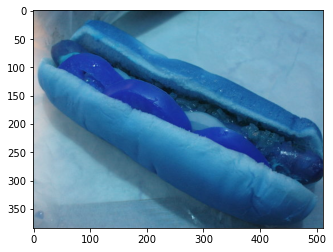

In [198]:
food_detected = what_did_i_eat(photo)

In [234]:
print(food_detected)

hot_dog


In [286]:
def query_food(food):
    headers = {
        'accept': 'application/json',
        'x-app-id': '78e5f314',
        'x-app-key': '20c5805d7a0bd82e0313e5f1c574596f',
        'x-remote-user-id': 'codyy',
        # Already added when you pass json= but not when you pass data=
        # 'Content-Type': 'application/json',
    }

    query = 'one serving of %s' % food

    json_data = {
        'query': '',
    }
    json_data['query'] = query
    response = requests.post('https://trackapi.nutritionix.com/v2/natural/nutrients', headers=headers, json=json_data)
    return json.loads(response.text)



In [287]:
# query_food(food_detected)

In [288]:
# response_dict = json.loads(query_food(food_detected))


In [275]:
def show_nutrition(response_dict):
    output = 'food name: \n'
    output = output + str(response_dict['foods'][0]['food_name']) + '\n' + \
         'calories: ' + str(response_dict['foods'][0]['nf_calories']) + 'g\n'+ \
         'total fat: ' + str(response_dict['foods'][0]['nf_total_fat']) + 'g\n' + \
         'sodium: ' + str(response_dict['foods'][0]['nf_sodium']) + 'g\n'+ \
         'total carbohydrate: ' + str(response_dict['foods'][0]['nf_total_carbohydrate']) + 'g\n'+ \
         'fiber: ' + str(response_dict['foods'][0]['nf_dietary_fiber']) + 'g\n'+ \
         'sugars: ' + str(response_dict['foods'][0]['nf_sugars']) + 'g\n'+ \
         'protein: ' + str(response_dict['foods'][0]['nf_protein']) + 'g\n'
    return output
    
print(show_nutrition(response_dict))

food name: 
hot dog
calories: 154.56g
total fat: 14.09g
sodium: 408.96g
total carbohydrate: 1.28g
fiber: 0g
sugars: 0.61g
protein: 5.61g



pad_thai
food name: 
pad thai
calories: 838.4g
total fat: 44.65g
sodium: 1301.34g
total carbohydrate: 45.59g
fiber: 4.38g
sugars: 17.95g
protein: 64.07g



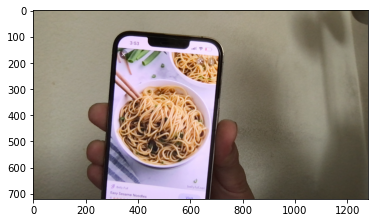

In [315]:
food = what_did_i_eat_cam(frame)
print(food)
print(show_nutrition(query_food(food)))

In [297]:
PATH = '/Users/codyyu/Desktop/EE267/Project/test_photos/'

pizza
food name: 
pizza
calories: 284.62g
total fat: 10.37g
sodium: 639.86g
total carbohydrate: 35.66g
fiber: 2.46g
sugars: 3.83g
protein: 12.19g



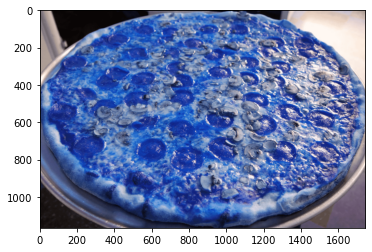

In [298]:
food = what_did_i_eat(PATH + 'pizza.png')
print(food)

#print(query_food(food))
print(show_nutrition(query_food(food)))

steak
food name: 
steak
calories: 614.38g
total fat: 40.77g
sodium: 114.92g
total carbohydrate: 0g
fiber: 0g
sugars: 0g
protein: 57.81g



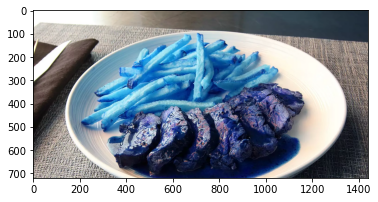

In [303]:
food = what_did_i_eat(PATH + 'steak_n_fries.webp')
print(food)
print(show_nutrition(query_food(food)))

falafel
food name: 
falafel
calories: 83.14g
total fat: 7.31g
sodium: 30.22g
total carbohydrate: 3.72g
fiber: 0.9g
sugars: 0.6g
protein: 1.07g



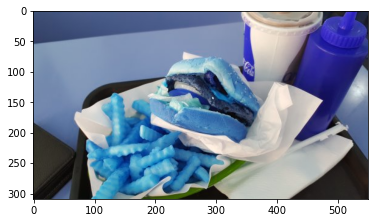

In [304]:
food = what_did_i_eat(PATH + 'burger.jpeg')
print(food)
print(show_nutrition(query_food(food)))